<a href="https://colab.research.google.com/github/vari76/project-2-master/blob/main/Assignment2_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Features:
 ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']

Target Variable:
 ['class_0' 'class_1' 'class_2']

Missing values in dataset:
 alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
dtype: int64

Training set shape: (142, 13), Testing set shape: (36, 13)


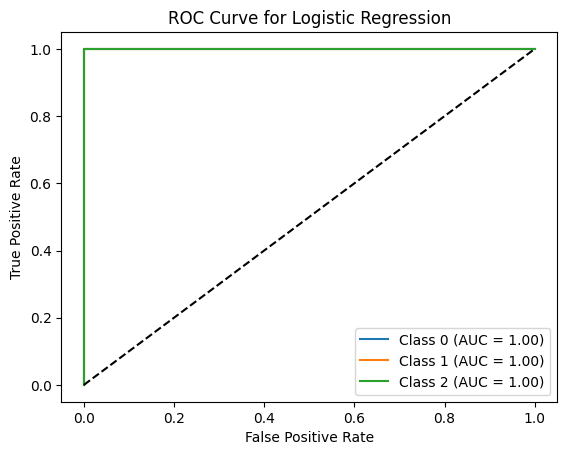

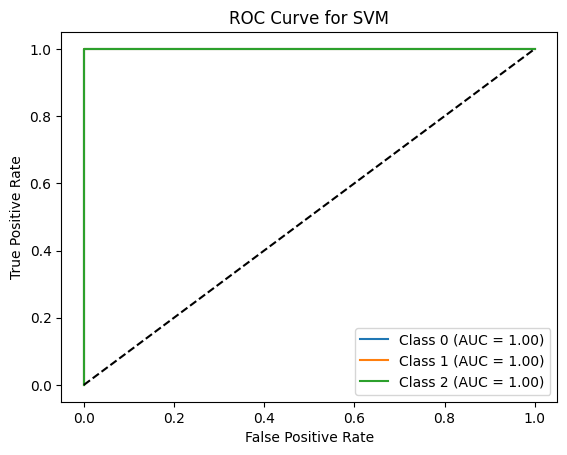

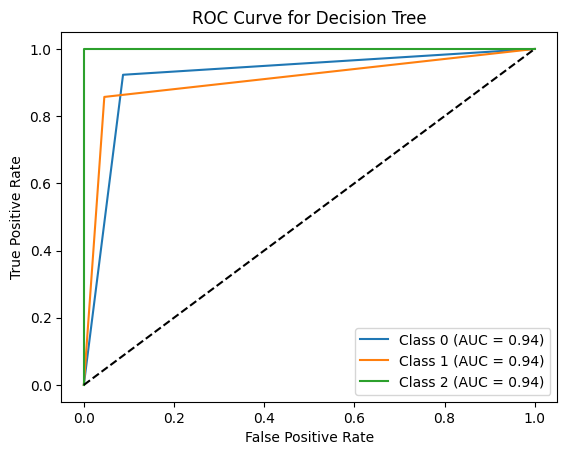

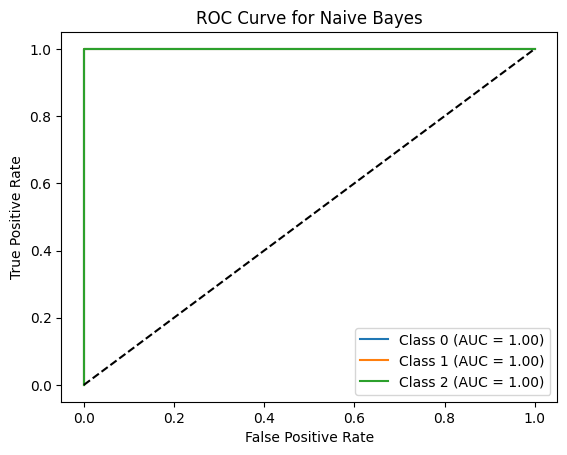

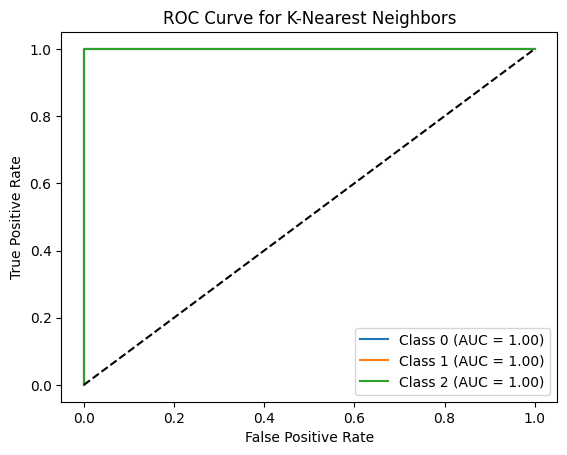

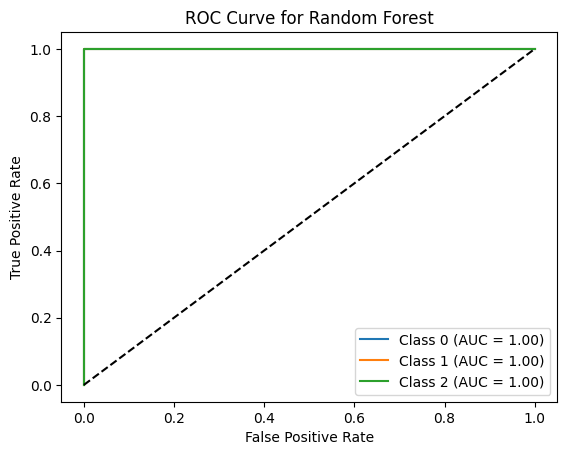


Model Performance Comparison:
                      Accuracy  Precision    Recall  F1 Score       AUC
Logistic Regression  1.000000   1.000000  1.000000  1.000000  1.000000
SVM                  1.000000   1.000000  1.000000  1.000000  1.000000
Decision Tree        0.916667   0.918498  0.916667  0.916667  0.941301
Naive Bayes          1.000000   1.000000  1.000000  1.000000  1.000000
K-Nearest Neighbors  0.972222   0.974206  0.972222  0.972222  1.000000
Random Forest        1.000000   1.000000  1.000000  1.000000  1.000000


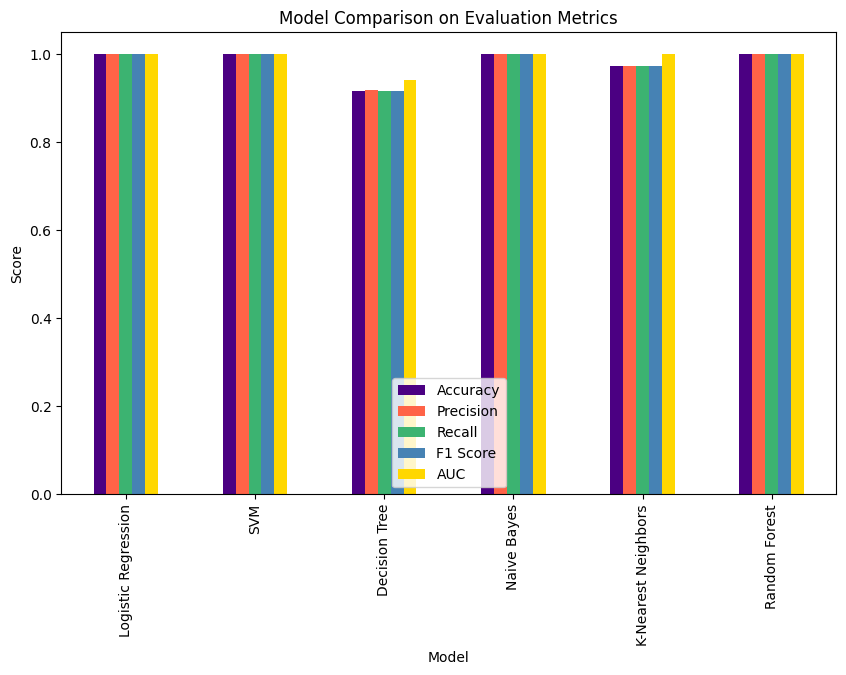

In [1]:
# code by Varinderjeet Kaur
# Student Number:249421330
# Assignment2_classification
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine

# Load dataset
data = load_wine()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name='target')

# Brief description of features and target variable
print("Features:\n", X.columns.tolist())
print("\nTarget Variable:\n", data.target_names)

# Check for missing values
print("\nMissing values in dataset:\n", X.isnull().sum())

# Split dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=34)

# Display the shapes of the resulting datasets
print(f"\nTraining set shape: {X_train.shape}, Testing set shape: {X_test.shape}")

# Preprocessing: Standard scaling for numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize models
models = {
    'Logistic Regression': OneVsRestClassifier(LogisticRegression(max_iter=200)),
    'SVM': OneVsRestClassifier(SVC(probability=True)),
    'Decision Tree': DecisionTreeClassifier(),
    'Naive Bayes': GaussianNB(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier()
}

# Train models and evaluate
results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Check if model has predict_proba; for Decision Tree, KNN, and Random Forest, it should be fine without OneVsRest
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)
    else:
        y_prob = np.zeros((y_test.shape[0], len(np.unique(y))))  # For models without predict_proba

    # Compute evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Compute multi-class AUC
    try:
        auc = roc_auc_score(y_test, y_prob, multi_class='ovr')
    except ValueError:
        auc = np.nan  # If AUC can't be computed for this model

    results[model_name] = [accuracy, precision, recall, f1, auc]

    # Create a new figure for each model's ROC curve
    plt.figure()
    for i in range(len(np.unique(y))):
        fpr, tpr, _ = roc_curve(y_test == i, y_prob[:, i])
        plt.plot(fpr, tpr, label=f"Class {i} (AUC = {auc:.2f})" if not np.isnan(auc) else f"Class {i}")

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {model_name}')
    plt.legend(loc='best')
    plt.show()

# Compile results into a DataFrame for easy comparison
results_df = pd.DataFrame(results, index=['Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC']).T
print("\nModel Performance Comparison:\n", results_df)

# Save results to a .csv file
results_df.to_csv('model_performance.csv')

# Display bar plot for overall metric comparison
results_df.plot(kind='bar', figsize=(10, 6), color=['#4B0082', '#FF6347', '#3CB371', '#4682B4', '#FFD700'])
plt.title('Model Comparison on Evaluation Metrics')
plt.xlabel('Model')
plt.ylabel('Score')
plt.show()
